# LioJotstar Merger: Data Analysis with Python for Strategic Optimization

## 11. Monetizing Content: Revenue Patterns from User Engagement
This notebook aims to understand how LioCinema and Jotstar monetize their content through user engagement. It analyzes and visualizes monthly revenue trends, geographic revenue distribution, the impact of plan upgrades on revenue, and the revenue generated by different subscription plan transitions using grouped bar charts, line charts, and stacked bar charts to identify key revenue drivers.

### Importing Required Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Required DataFrames from Saved Parquet Files

In [6]:
try:
    jotstar_subscribers_df = pd.read_parquet('Parquet Data Files/03. Feature Engineering/Jotstar_db/subscribers.parquet')
    print("Jotstar - Subscribers table loaded successfully.")
    liocinema_subscribers_df = pd.read_parquet('Parquet Data Files/03. Feature Engineering/LioCinema_db/subscribers.parquet')
    print("LioCinema - Subscribers table loaded successfully.")
    print("\nData Loading Complete.")
    
except FileNotFoundError as e:
       print("Error: One or more Parquet files not found. Please check the file paths.")
       print(f"Details: {e}")
except Exception as e:
       print("An error occurred during data import.")
       print(f"Details: {e}")

Jotstar - Subscribers table loaded successfully.
LioCinema - Subscribers table loaded successfully.

Data Loading Complete.


### Data Analysis & Visualization

In [8]:
# Computing Total Revenue for Jotstar
jotstar_plan_prices = {
    "Free": 0,
    "VIP": 159,
    "Premium": 359
}

jotstar_revenue_df = jotstar_subscribers_df.copy()

def calculate_months_active(df):
    start_date = df['Subscription Date']
    end_date = df['Last Active Date'] if pd.notna(df['Last Active Date']) else pd.Timestamp("2024-12-30") 
    
    if pd.notna(df['Plan Change Date']):  
        old_plan_active_months = max(1, ((df['Plan Change Date'] - start_date).days) // 30)
        new_plan_active_months = max(1, ((end_date - df['Plan Change Date']).days) // 30) 
        return old_plan_active_months, new_plan_active_months
    else:
        total_active_months = max(1, ((end_date - start_date).days) // 30)
        return total_active_months, 0

jotstar_revenue_df[['Months Active - Old Plan', 'Months Active - New Plan']] = jotstar_revenue_df.apply(calculate_months_active, axis = 1, 
                                                                                                        result_type = "expand")

jotstar_revenue_df['Subscription Plan Price'] = jotstar_revenue_df['Subscription Plan'].map(jotstar_plan_prices)
jotstar_revenue_df['New Subscription Plan Price'] = jotstar_revenue_df['New Subscription Plan'].map(jotstar_plan_prices)

jotstar_revenue_df['Revenue - Old Plan'] = jotstar_revenue_df['Months Active - Old Plan'] * jotstar_revenue_df['Subscription Plan Price']
jotstar_revenue_df['Revenue - New Plan'] = jotstar_revenue_df['Months Active - New Plan'] * jotstar_revenue_df['New Subscription Plan Price']

jotstar_revenue_df['Total Revenue Per User'] = jotstar_revenue_df['Revenue - Old Plan'].fillna(0) + jotstar_revenue_df['Revenue - New Plan'].fillna(0)

total_revenue = jotstar_revenue_df['Total Revenue Per User'].sum()

print(f'Total Revenue Generated for Jotstar: ₹{total_revenue:,}')

Total Revenue Generated for Jotstar: ₹47,398,403


In [9]:
jotstar_revenue_df

,User ID,Age Group,City Tier,Subscription Date,Subscription Plan,Last Active Date,Plan Change Date,New Subscription Plan,Plan Change Type,Plan Transition,Months Active - Old Plan,Months Active - New Plan,Subscription Plan Price,New Subscription Plan Price,Revenue - Old Plan,Revenue - New Plan,Total Revenue Per User
0,UIDJS0000751588f,18-24,Tier 1,2024-06-10,Premium,NaT,NaT,Premium,No Change,Premium → Premium,6,0,359,359,2154,0,2154
1,UIDJS000093eeb86,18-24,Tier 1,2024-11-09,Free,NaT,NaT,Free,No Change,Free → Free,1,0,0,0,0,0,0
2,UIDJS00010d7fa1e,25-34,Tier 1,2024-08-08,Free,NaT,NaT,Free,No Change,Free → Free,4,0,0,0,0,0,0
3,UIDJS00013411a85,35-44,Tier 2,2024-05-31,VIP,NaT,NaT,VIP,No Change,VIP → VIP,7,0,159,159,1113,0,1113
4,UIDJS0003a3f54cf,35-44,Tier 1,2024-09-20,Premium,NaT,NaT,Premium,No Change,Premium → Premium,3,0,359,359,1077,0,1077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44615,UIDJSfffbb38249e,25-34,Tier 2,2024-11-12,Free,NaT,NaT,Free,No Change,Free → Free,1,0,0,0,0,0,0
44616,UIDJSfffbd759005,45+,Tier 1,2024-05-21,VIP,NaT,NaT,VIP,No Change,VIP → VIP,7,0,159,159,1113,0,1113
44617,UIDJSfffebd3002b,25-34,Tier 1,2024-09-27,VIP,2024-10-29,NaT,VIP,No Change,VIP → VIP,1,0,159,159,159,0,159
44618,UIDJSffff6698084,35-44,Tier 3,2024-10-12,VIP,NaT,NaT,VIP,No Change,VIP → VIP,2,0,159,159,318,0,318


In [10]:
# Computing Total Revenue for LioCinema
liocinema_plan_prices = {
    "Free": 0,
    "Basic": 69,
    "Premium": 129
}

liocinema_revenue_df = liocinema_subscribers_df.copy()

def calculate_months_active(df):
    start_date = df['Subscription Date']
    end_date = df['Last Active Date'] if pd.notna(df['Last Active Date']) else pd.Timestamp("2024-12-30") 
    
    if pd.notna(df['Plan Change Date']):  
        old_plan_active_months = max(1, ((df['Plan Change Date'] - start_date).days) // 30)
        new_plan_active_months = max(1, ((end_date - df['Plan Change Date']).days) // 30) 
        return old_plan_active_months, new_plan_active_months
    else:
        total_active_months = max(1, ((end_date - start_date).days) // 30)
        return total_active_months, 0

liocinema_revenue_df[['Months Active - Old Plan', 'Months Active - New Plan']] = liocinema_revenue_df.apply(calculate_months_active, axis = 1,
                                                                                                            result_type = "expand")

liocinema_revenue_df['Subscription Plan Price'] = liocinema_revenue_df['Subscription Plan'].map(liocinema_plan_prices)
liocinema_revenue_df['New Subscription Plan Price'] = liocinema_revenue_df['New Subscription Plan'].map(liocinema_plan_prices)

liocinema_revenue_df['Revenue - Old Plan'] = liocinema_revenue_df['Months Active - Old Plan'] * liocinema_revenue_df['Subscription Plan Price']
liocinema_revenue_df['Revenue - New Plan'] = liocinema_revenue_df['Months Active - New Plan'] * liocinema_revenue_df['New Subscription Plan Price']

liocinema_revenue_df['Total Revenue Per User'] = liocinema_revenue_df['Revenue - Old Plan'].fillna(0) + liocinema_revenue_df['Revenue - New Plan'].fillna(0)

total_revenue = liocinema_revenue_df['Total Revenue Per User'].sum()

print(f'Total Revenue Generated for LioCinema: ₹{total_revenue:,}')

Total Revenue Generated for LioCinema: ₹17,997,081


In [11]:
liocinema_revenue_df

,User ID,Age Group,City Tier,Subscription Date,Subscription Plan,Last Active Date,Plan Change Date,New Subscription Plan,Plan Change Type,Plan Transition,Months Active - Old Plan,Months Active - New Plan,Subscription Plan Price,New Subscription Plan Price,Revenue - Old Plan,Revenue - New Plan,Total Revenue Per User
0,UIDLC00000bea68a,25-34,Tier 3,2024-10-24,Free,NaT,NaT,Free,No Change,Free → Free,2,0,0,0,0,0,0
1,UIDLC00009202848,18-24,Tier 1,2024-09-18,Basic,NaT,NaT,Basic,No Change,Basic → Basic,3,0,69,69,207,0,207
2,UIDLC0001086afc3,35-44,Tier 2,2024-03-23,Premium,NaT,2024-04-23,Free,Downgrade,Premium → Free,1,8,129,0,129,0,129
3,UIDLC000186abd93,18-24,Tier 3,2024-09-07,Free,2024-10-23,NaT,Free,No Change,Free → Free,1,0,0,0,0,0,0
4,UIDLC0002189b09f,18-24,Tier 2,2024-10-07,Premium,NaT,2024-11-07,Free,Downgrade,Premium → Free,1,1,129,0,129,0,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183441,UIDLCffff41ace17,18-24,Tier 2,2024-10-16,Free,2024-11-07,NaT,Free,No Change,Free → Free,1,0,0,0,0,0,0
183442,UIDLCffff85ea59a,25-34,Tier 2,2024-08-09,Basic,NaT,NaT,Basic,No Change,Basic → Basic,4,0,69,69,276,0,276
183443,UIDLCffffbb55ff5,18-24,Tier 2,2024-11-22,Free,NaT,NaT,Free,No Change,Free → Free,1,0,0,0,0,0,0
183444,UIDLCffffc6f6db0,18-24,Tier 1,2024-05-01,Basic,2024-10-10,NaT,Basic,No Change,Basic → Basic,5,0,69,69,345,0,345


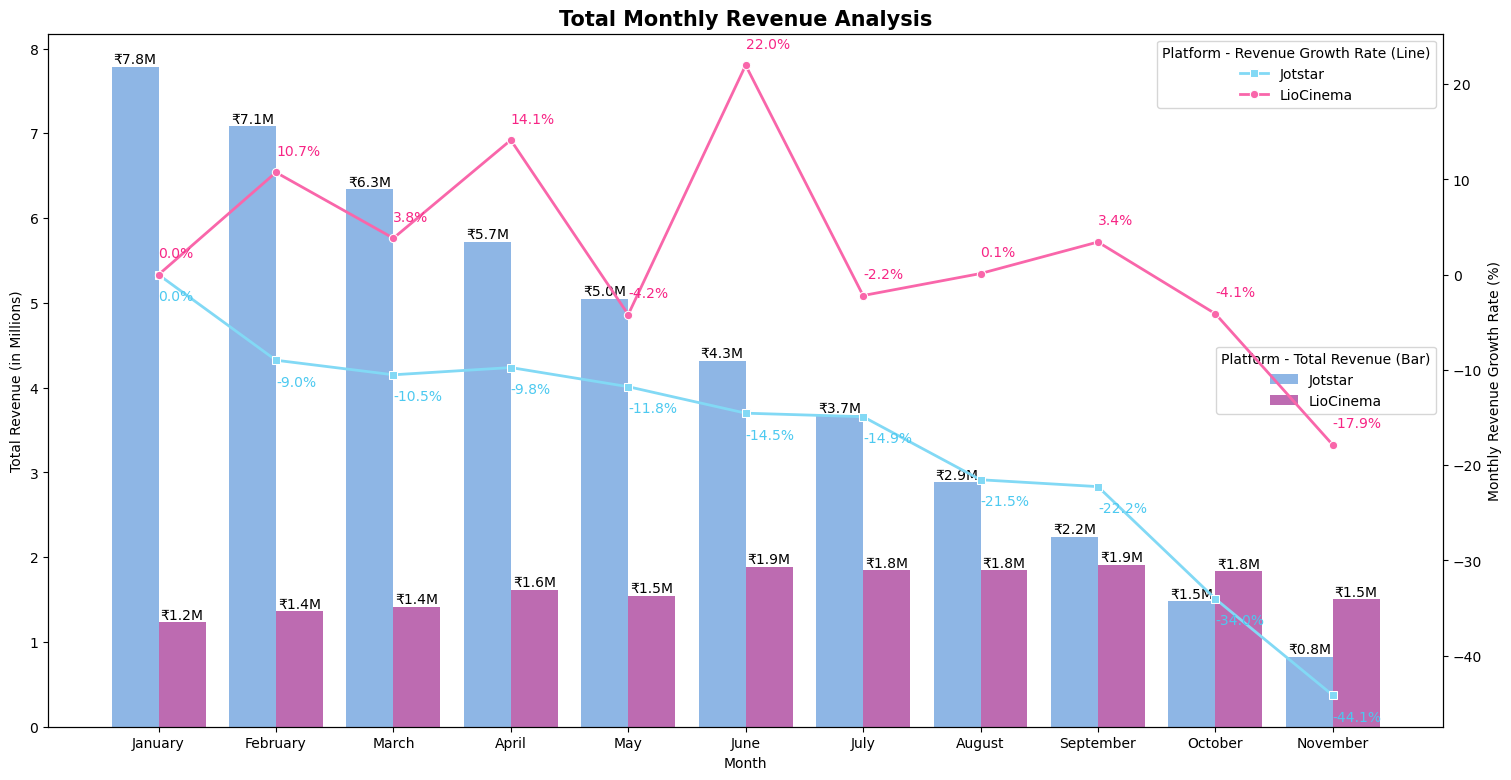

In [12]:
def get_monthly_revenue_growth_rate(df):
    temp_df = df[["Subscription Date", "Total Revenue Per User"]].copy()
    temp_df['Subscription Month Number'] = temp_df['Subscription Date'].dt.month
    temp_df['Subscription Month'] = temp_df['Subscription Date'].dt.month_name()
    result = temp_df.groupby(['Subscription Month Number', 'Subscription Month'])['Total Revenue Per User'].sum()
    result = result.to_frame().rename(columns = {'Total Revenue Per User': 'Total Revenue'})
    result['Monthly Revenue Growth Rate (%)'] = round(result['Total Revenue'].pct_change() * 100, 2)
    result['Monthly Revenue Growth Rate (%)'] = result['Monthly Revenue Growth Rate (%)'].fillna(0)
    result['Total Revenue'] = result['Total Revenue'] / 1_000_000  
    return result
    
jotstar_monthly_revenue_growth_rate_df = get_monthly_revenue_growth_rate(jotstar_revenue_df)
liocinema_monthly_revenue_growth_rate_df = get_monthly_revenue_growth_rate(liocinema_revenue_df)
jotstar_monthly_revenue_growth_rate_df['Platform'] = "Jotstar"
liocinema_monthly_revenue_growth_rate_df['Platform'] = "LioCinema"
merged_df = pd.concat([jotstar_monthly_revenue_growth_rate_df, liocinema_monthly_revenue_growth_rate_df])
merged_df = merged_df.reset_index('Subscription Month')
merged_df = merged_df.sort_index()

fig, ax1 = plt.subplots(figsize = (18, 9))
ax2 = ax1.twinx()

bp = sns.barplot(x = 'Subscription Month', y = 'Total Revenue', data = merged_df, hue = 'Platform', palette = ["#7FB5F4", "#CB5DBB"], 
                 ax = ax1)
for i in bp.containers:
    bp.bar_label(i, fmt = "₹%.1fM")

sns.lineplot(x = 'Subscription Month', y = 'Monthly Revenue Growth Rate (%)', data = merged_df[merged_df['Platform'] == "Jotstar"], 
             color = "#82D9F5", marker = "s", linewidth = 2, ax = ax2, label = "Jotstar")
for a, b, platform in zip(merged_df['Subscription Month'], merged_df['Monthly Revenue Growth Rate (%)'], merged_df['Platform']):
    if platform == "Jotstar": 
        plt.text(x = a, y = b - 2.7, s = f"{b:.1f}%", color = "#4CC9F0")

sns.lineplot(x = 'Subscription Month', y = 'Monthly Revenue Growth Rate (%)', data = merged_df[merged_df['Platform'] == "LioCinema"], 
             color = "#F966AA", marker = "o", linewidth = 2, ax = ax2, label = "LioCinema")
for a, b, platform in zip(merged_df['Subscription Month'], merged_df['Monthly Revenue Growth Rate (%)'], merged_df['Platform']):
    if platform == "LioCinema": 
        plt.text(x = a, y = b + 1.8, s = f"{b:.1f}%", color = "#F72585")

plt.title("Total Monthly Revenue Analysis", fontsize = 15, fontweight = "bold")
ax1.set_ylabel("Total Revenue (in Millions)")
ax1.set_xlabel("Month")
ax1.grid(False)
ax2.grid(False)
ax1.legend(title = "Platform - Total Revenue (Bar)", loc = "center right")
ax2.legend(title = "Platform - Revenue Growth Rate (Line)", loc = "upper right")

# Saving multi-row KPI to Excel for Tabular viewing
merged_df.to_excel('KPIs Excel Files/Monthly Revenue Growth Rate.xlsx')

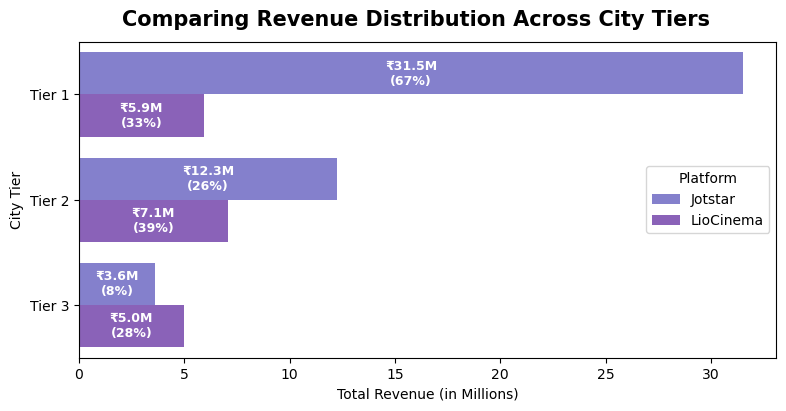

In [13]:
def get_revenue(df):
    result = df.groupby(['City Tier'])['Total Revenue Per User'].sum()
    result = result.to_frame().rename(columns={'Total Revenue Per User': 'Total Revenue'}).reset_index()
    result['Total Revenue (%)'] = result['Total Revenue'] / (result['Total Revenue'].sum()) * 100
    result['Total Revenue'] = result['Total Revenue'] / 1_000_000  
    return result
    
jotstar_temp_df = get_revenue(jotstar_revenue_df)
jotstar_temp_df['Platform'] = "Jotstar"
liocinema_temp_df = get_revenue(liocinema_revenue_df)
liocinema_temp_df['Platform'] = "LioCinema"
merged_df = pd.concat([jotstar_temp_df, liocinema_temp_df])

plt.figure(figsize = (9, 4))
plt.subplots_adjust(top = 0.9)
plt.suptitle("Comparing Revenue Distribution Across City Tiers", fontsize = 15, fontweight = "bold")

bp = sns.barplot(merged_df, y = 'City Tier', x = 'Total Revenue', hue = 'Platform', palette = ["#7973D9", "#8954C6"])

for bar, rev, pct in zip(bp.patches, merged_df["Total Revenue"], merged_df["Total Revenue (%)"]):
    x = bar.get_x() + bar.get_width() / 2  
    y = bar.get_y() + bar.get_height() / 2
    label = f"₹{rev:.1f}M\n({pct:.0f}%)"  
    plt.text(x, y, label, ha = "center", va = "center", color = "white", fontsize = 9, fontweight = "bold")

plt.xlabel("Total Revenue (in Millions)")
plt.legend(title = "Platform", loc = "center right")

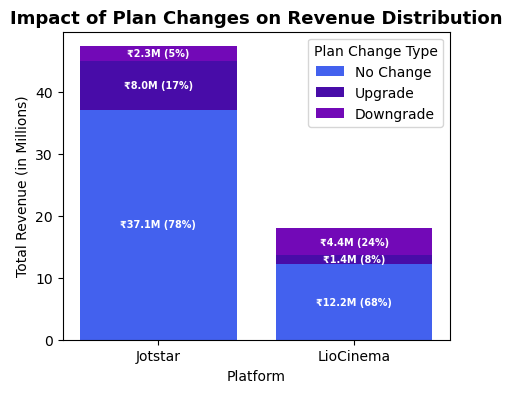

In [14]:
def get_revenue(df):
    result = df.groupby(['Plan Change Type'])['Total Revenue Per User'].sum().reset_index()
    result = result.rename(columns = {'Total Revenue Per User': 'Total Revenue'})
    result['Total Revenue (%)'] = (result['Total Revenue'] / result['Total Revenue'].sum()) * 100
    result['Total Revenue'] /= 1_000_000  
    return result

jotstar_temp_df = get_revenue(jotstar_revenue_df)
liocinema_temp_df = get_revenue(liocinema_revenue_df)
jotstar_temp_df['Platform'] = "Jotstar"
liocinema_temp_df['Platform'] = "LioCinema"
merged_df = pd.concat([jotstar_temp_df, liocinema_temp_df])

pivot_df = merged_df.pivot(index = 'Platform', columns = "Plan Change Type", values = ['Total Revenue', 'Total Revenue (%)']).fillna(0)

total_revenue = pivot_df['Total Revenue']
total_pct = pivot_df['Total Revenue (%)']

fig, ax = plt.subplots(figsize =  (5, 4))

bars_nc = ax.bar(total_revenue.index, total_revenue.get("No Change", 0), color = "#4361EE", label = "No Change")

bars_up = ax.bar(total_revenue.index, total_revenue.get("Upgrade", 0), 
                 bottom = total_revenue.get("No Change", 0), 
                 color = "#480CA8", label = "Upgrade")

bars_down = ax.bar(total_revenue.index, total_revenue.get("Downgrade", 0), 
                   bottom  = total_revenue.get("No Change", 0) + total_revenue.get("Upgrade", 0), 
                   color = "#7209B7", label = "Downgrade")

for bars, plan_type in zip([bars_nc, bars_up, bars_down], ["No Change", "Upgrade", "Downgrade"]):
    for bar, pct in zip(bars, total_pct.get(plan_type, [0] * len(bars))):
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2,  
                    f"₹{height:.1f}M ({pct:.0f}%)",  
                    ha = "center", va = "center", color = "white", fontsize = 7, fontweight = "bold")

ax.set_xlabel("Platform")
ax.set_ylabel("Total Revenue (in Millions)")
ax.set_title("Impact of Plan Changes on Revenue Distribution", fontsize = 13, fontweight = "bold")
ax.legend(title = "Plan Change Type", loc = "best")

Text(0, 0.5, 'Plan Transition')

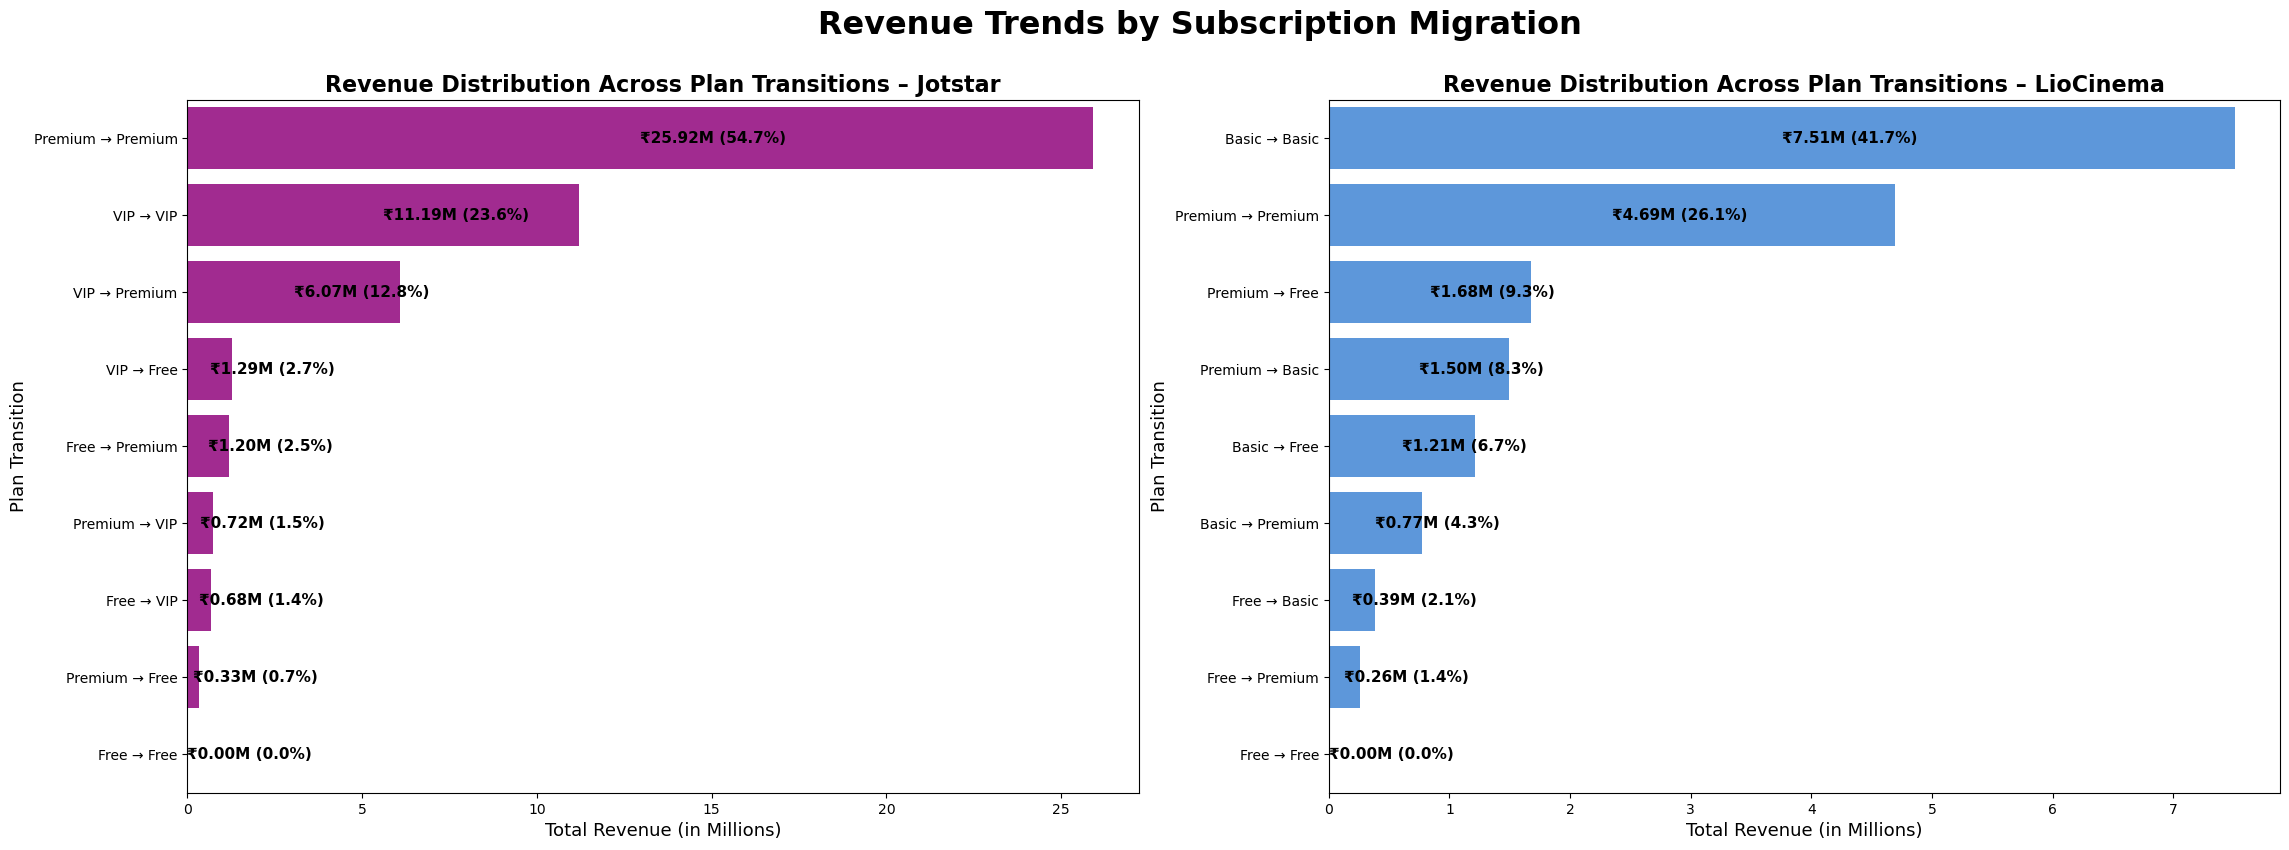

In [15]:
def get_revenue(df): 
    result = df.groupby('Plan Transition')['Total Revenue Per User'].sum().reset_index()
    result = result.rename(columns = {'Total Revenue Per User':'Total Revenue'})
    result['Total Revenue'] = result['Total Revenue'] / 1_000_000
    result['Total Revenue (%)'] = result['Total Revenue'] / (result['Total Revenue'].sum()) * 100
    result = result.sort_values('Total Revenue', ascending = False)
    return result
    
jotstar_temp_df = get_revenue(jotstar_revenue_df)
liocinema_temp_df = get_revenue(liocinema_revenue_df)

plt.figure(figsize = (27, 9))
plt.suptitle("Revenue Trends by Subscription Migration", fontsize = 23, fontweight = "bold")

ax1 = plt.subplot(1, 2, 1)
plt.title("Revenue Distribution Across Plan Transitions – Jotstar", fontsize = 16,fontweight = "bold")

jotstar_bar_plot = sns.barplot(jotstar_temp_df, y = 'Plan Transition', x = 'Total Revenue', color = "#B5179E")
for bar, (_, row) in zip(jotstar_bar_plot.patches, jotstar_temp_df.iterrows()):
    rev, pct = row["Total Revenue"], row["Total Revenue (%)"]
    x = bar.get_width() / 2
    y = bar.get_y() + bar.get_height() / 2
    plt.text(x, y, f"₹{rev:.2f}M ({pct:.1f}%)", ha = "left", va = "center", fontsize = 11, color = "black", fontweight = "bold")
plt.xlabel("Total Revenue (in Millions)", fontsize = 13)
plt.ylabel("Plan Transition", fontsize = 13)

ax2 = plt.subplot(1, 2, 2)
plt.title("Revenue Distribution Across Plan Transitions – LioCinema", fontsize = 16, fontweight = "bold")

liocinema_bar_plot = sns.barplot(liocinema_temp_df, y = 'Plan Transition', x = 'Total Revenue', color = "#4895EF")
for bar, (_, row) in zip(liocinema_bar_plot.patches, liocinema_temp_df.iterrows()):
    rev, pct = row["Total Revenue"], row["Total Revenue (%)"]
    x = bar.get_width() / 2
    y = bar.get_y() + bar.get_height() / 2
    plt.text(x, y, f"₹{rev:.2f}M ({pct:.1f}%)", ha = "left", va = "center", fontsize = 11, color = "black", fontweight = "bold")
plt.xlabel("Total Revenue (in Millions)", fontsize = 13)
plt.ylabel("Plan Transition", fontsize = 13)

### Exporting Processed DataFrames to Parquet Files

In [17]:
# Saving Jotstar Revenue DataFrame in Parquet Format
jotstar_revenue_df.to_parquet('Parquet Data Files/11. Monetization/Jotstar_db/revenue.parquet', index = False)

# Saving LioCinema Revenue DataFrame in Parquet Format
liocinema_revenue_df.to_parquet('Parquet Data Files/11. Monetization/LioCinema_db/revenue.parquet', index = False)

print("Revenue DataFrames are saved as Parquet files successfully.")

Revenue DataFrames are saved as Parquet files successfully.


## Conclusion: "Driving Lio-Jotstar's Success: A Data-Backed Merger Strategy"